In [1]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Trails_data.csv')
survey_df = pd.read_csv('/content/drive/MyDrive/hiking_preferences.csv')

# Survey_df

In [5]:
survey_df.head()

,Timestamp,Your name,Hometown,Which best describes your home place?,How do you prefer to spend your weekends?,How would you describe your fitness level?,Have you ever been on a hike ?,What kind of hiking trail would you try (or have tried)? (Choose up to 3),Who would you go hiking with?,What would make a hiking trail perfect for you?,What’s your dream hiking destination?,What’s your hiking playlist vibe?,"If the weather’s not great, would you still go hiking?","On a scale of 1-5, how likely are you to go hiking in the next vacation?",Email Address
0,10/6/2024 22:35:21,Arnava Srivastava,Lucknow,A big city 🌆,Watching movies or gaming,Pretty active 💪,"Yes, a few times","A nice challenge (5-10 km), Long and tough (ov...",With friends or a group,Close to a cool destination (like a waterfall ...,Anywhere with breathtaking views!,"No music, just the sound of nature 🐦",Maybe if it’s just cloudy ☁️,2,NaN
1,10/6/2024 23:05:01,Ronak Gadhiya,Surat,A big city 🌆,Watching movies or gaming,Couch potato 🛋,"Yes, a few times","Short and sweet (under 5 km), Easy paths with ...",With friends or a group,Great scenery 🌄,Anywhere with breathtaking views!,"No music, just the sound of nature 🐦",Maybe if it’s just cloudy ☁️,4,NaN
2,10/20/2024 16:09:01,Rohan,Kangani,Village,Watching movies or gaming,Pretty active 💪,Not my thing,"Easy paths with good views 🏞, Thrilling and to...",Family trips,Great scenery 🌄,A tropical island 🏝,"No music, just the sound of nature 🐦","No way, I’ll reschedule 🛌",5,NaN
3,10/20/2024 16:11:05,Atharva Kamble,Dapoli,A peaceful small town 🏡,Watching movies or gaming,Couch potato 🛋,"Yes, a few times",A nice challenge (5-10 km),With friends or a group,Great scenery 🌄,Anywhere with breathtaking views!,"No music, just the sound of nature 🐦","No way, I’ll reschedule 🛌",4,NaN
4,10/25/2024 10:15:47,Vedant Funde,Noida,A big city 🌆,Chilling with friends,Athlete level 🏃‍♀️,Not my thing,Short and sweet (under 5 km),With friends or a group,Good weather ☀️,Anywhere with breathtaking views!,Pumped-up workout beats 🎧,"No way, I’ll reschedule 🛌",2,NaN


In [6]:
survey_df.columns

Index(['Timestamp', 'Your name', 'Hometown',
       'Which best describes your home place?',
       'How do you prefer to spend your weekends?',
       'How would you describe your fitness level?',
       'Have you ever been on a hike ?',
       'What kind of hiking trail would you try (or have tried)? (Choose up to 3)',
       'Who would you go hiking with?',
       'What would make a hiking trail perfect for you?',
       'What’s your dream hiking destination?',
       'What’s your hiking playlist vibe?',
       'If the weather’s not great, would you still go hiking?',
       'On a scale of 1-5, how likely are you to go hiking in the next vacation? ',
       'Email Address'],
      dtype='object')

In [7]:
survey_df.isna().sum()

,0
Timestamp,0
Your name,0
Hometown,0
Which best describes your home place?,0
How do you prefer to spend your weekends?,0
How would you describe your fitness level?,0
Have you ever been on a hike ?,0
What kind of hiking trail would you try (or have tried)? (Choose up to 3),1
Who would you go hiking with?,0
What would make a hiking trail perfect for you?,0


In [8]:
survey_df.drop(columns=['Email Address'], inplace=True)


In [9]:
#remove the row with missing value for travel preference
new_df = survey_df.dropna(subset=['What kind of hiking trail would you try (or have tried)? (Choose up to 3)'])

In [10]:
new_df.isna().sum()

,0
Timestamp,0
Your name,0
Hometown,0
Which best describes your home place?,0
How do you prefer to spend your weekends?,0
How would you describe your fitness level?,0
Have you ever been on a hike ?,0
What kind of hiking trail would you try (or have tried)? (Choose up to 3),0
Who would you go hiking with?,0
What would make a hiking trail perfect for you?,0


# Trails data processing

In [11]:
df.head()

,Trail_name,link_AllTrails,image,Difficulty,Average_rating,number_of_reviews,Location,Location.1,Length,description,Tags
0,Triund Trek Loop,https://www.alltrails.com/trail/india/himachal...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.6,(72),"Dharmshala, Himachal Pradesh, India",NaN,Length: 19.0 km,This is one of the top tourist destinations in...,"Camping, Bird watching, Hiking, Snowshoeing, B..."
1,Lamadugh Natural Valley Trek,https://www.alltrails.com/trail/india/himachal...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.3,(86),NaN,Manali Wildlife Sanctuary,Length: 11.4 km,Lamadugh (Also known as Lamadug) is a popular ...,"Camping, Bird watching, Hiking, Snowshoeing, B..."
2,Sinhagad Fort,https://www.alltrails.com/trail/india/maharash...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.8,(227),"Velhe, Maharashtra, India",NaN,Length: 8.0 km,Sinhagad Fort is a fort that was built 2000 ye...,"Hiking, Walking, Partially paved, Forest, View..."
3,Blackberry Hill - Attukad Falls Loop,https://www.alltrails.com/trail/india/kerala/b...,https://www.alltrails.com/api/alltrails/v2/tra...,Moderate,4.6,(64),"Munnar, Kerala, India",NaN,Length: 9.3 kmEst. 3h 10m,This is a beautiful mountain biking trail in M...,"Hiking, Mountain biking, Partially paved, Fore..."
4,Triund Hill Trek,https://www.alltrails.com/trail/india/himachal...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.6,(73),"Dharamsala, Himachal Pradesh, India",NaN,Length: 9.5 km,This is one of the top tourist destinations in...,"Camping, Bird watching, Hiking, Snowshoeing, W..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Trail_name         842 non-null    object 
 1   link_AllTrails     842 non-null    object 
 2   image              841 non-null    object 
 3   Difficulty         842 non-null    object 
 4   Average_rating     842 non-null    float64
 5   number_of_reviews  842 non-null    object 
 6   Location           524 non-null    object 
 7   Location.1         318 non-null    object 
 8   Length             842 non-null    object 
 9   description        818 non-null    object 
 10  Tags               842 non-null    object 
dtypes: float64(1), object(10)
memory usage: 72.5+ KB


In [13]:
df.isna().sum()

,0
Trail_name,0
link_AllTrails,0
image,1
Difficulty,0
Average_rating,0
number_of_reviews,0
Location,318
Location.1,524
Length,0
description,24


In [14]:
rows_with_missing_values = df[df[['Location', 'description']].isna().any(axis=1)]
rows_with_missing_values

,Trail_name,link_AllTrails,image,Difficulty,Average_rating,number_of_reviews,Location,Location.1,Length,description,Tags
1,Lamadugh Natural Valley Trek,https://www.alltrails.com/trail/india/himachal...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.3,(86),NaN,Manali Wildlife Sanctuary,Length: 11.4 km,Lamadugh (Also known as Lamadug) is a popular ...,"Camping, Bird watching, Hiking, Snowshoeing, B..."
5,Avalahalli Forest Loop,https://www.alltrails.com/trail/india/karnatak...,https://www.alltrails.com/api/alltrails/v2/tra...,Easy,4.6,(70),NaN,Avalahalli State Forest,Length: 6.8 kmEst. 1h 38m,Avalahalli State Forest is known for its many ...,"Hiking, Mountain biking, Running, Walking, For..."
7,Ram Jhula - Neelkanth Mahadev Trail,https://www.alltrails.com/trail/india/uttarakh...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.5,(38),NaN,Rajaji National Park,Length: 8.2 kmEst. 3h 13m,Neelkantha Mahadev is a Temple in Rishikesh th...,"Bird watching, Hiking, Backpacking, Paved, Cav..."
10,Kalsubai Peak Trail,https://www.alltrails.com/trail/india/maharash...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.5,(35),NaN,Kalsubai Harishchandragad Wildlife Sanctuary,Length: 6.9 km,This beautiful trail in the Shayadri takes one...,"Camping, Bird watching, Hiking, Walking, Backp..."
12,Tadiandamol Peak,https://www.alltrails.com/trail/india/karnatak...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.7,(32),NaN,Brahmagiri Wildlife Sanctuary,Length: 12.1 kmEst. 4h 54m,"Located in Coorg, Tadiandamol is the third-hig...","Bird watching, Hiking, Walking, Forest, River,..."
...,...,...,...,...,...,...,...,...,...,...,...
824,Ghatghar - Durga Fort via Dhakoba,https://www.alltrails.com/trail/india/maharash...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,5.0,(2),NaN,Bhimashankar Wildlife Sanctuary,Length: 16.7 kmEst. 5h 48m,This is a delightful trail in the Shayadris th...,"Camping, Bird watching, Hiking, Walking, Backp..."
830,Samrad - Sandhan Valley Trail,https://www.alltrails.com/trail/india/maharash...,https://www.alltrails.com/api/alltrails/v2/tra...,Moderate,4.5,(2),NaN,Kalsubai Harishchandragad Wildlife Sanctuary,Length: 9.2 km,The Sandhan Valley also known as the Valley of...,"Camping, Bird watching, Hiking, Backpacking, P..."
832,Chopta - Deoria Tal,https://www.alltrails.com/trail/india/uttarakh...,https://www.alltrails.com/api/alltrails/v3/tra...,Hard,5.0,(1),NaN,Kedarnath Wildlife Sanctuary,Length: 24.0 km,This beautiful trail in the Garwhal Himalayas ...,"Camping, Bird watching, Hiking, Snowshoeing, B..."
835,Hoshiarpur Loop,https://www.alltrails.com/trail/india/punjab/h...,https://www.alltrails.com/api/alltrails/v3/tra...,Moderate,3.9,(3),NaN,Takhni - Rehampur Wildlife Sanctuary,Length: 113.3 km,A beautiful drive around Taknhi - Rehampur Wil...,"Bird watching, Scenic driving, Forest, Lake"


In [15]:
# clean missing values
df['image'] = df['image'].fillna('No image available')

df['Location'] = df['Location'].fillna(df['Location.1'])

df['description'] = df['description'].fillna(df['Tags'])

In [16]:
df.isna().sum()

,0
Trail_name,0
link_AllTrails,0
image,0
Difficulty,0
Average_rating,0
number_of_reviews,0
Location,0
Location.1,524
Length,0
description,0


In [17]:
df.drop(columns=['Location.1'], inplace=True)

In [18]:
df.head()

,Trail_name,link_AllTrails,image,Difficulty,Average_rating,number_of_reviews,Location,Length,description,Tags
0,Triund Trek Loop,https://www.alltrails.com/trail/india/himachal...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.6,(72),"Dharmshala, Himachal Pradesh, India",Length: 19.0 km,This is one of the top tourist destinations in...,"Camping, Bird watching, Hiking, Snowshoeing, B..."
1,Lamadugh Natural Valley Trek,https://www.alltrails.com/trail/india/himachal...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.3,(86),Manali Wildlife Sanctuary,Length: 11.4 km,Lamadugh (Also known as Lamadug) is a popular ...,"Camping, Bird watching, Hiking, Snowshoeing, B..."
2,Sinhagad Fort,https://www.alltrails.com/trail/india/maharash...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.8,(227),"Velhe, Maharashtra, India",Length: 8.0 km,Sinhagad Fort is a fort that was built 2000 ye...,"Hiking, Walking, Partially paved, Forest, View..."
3,Blackberry Hill - Attukad Falls Loop,https://www.alltrails.com/trail/india/kerala/b...,https://www.alltrails.com/api/alltrails/v2/tra...,Moderate,4.6,(64),"Munnar, Kerala, India",Length: 9.3 kmEst. 3h 10m,This is a beautiful mountain biking trail in M...,"Hiking, Mountain biking, Partially paved, Fore..."
4,Triund Hill Trek,https://www.alltrails.com/trail/india/himachal...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.6,(73),"Dharamsala, Himachal Pradesh, India",Length: 9.5 km,This is one of the top tourist destinations in...,"Camping, Bird watching, Hiking, Snowshoeing, W..."


In [19]:
# clean the no_of_reviews column
# Use regex to extract numeric values from the 'number_of_reviews' column
df['number_of_reviews'] = df['number_of_reviews'].str.extract('(\d+)').astype(int)

df['number_of_reviews'].head()


,number_of_reviews
0,72
1,86
2,227
3,64
4,73


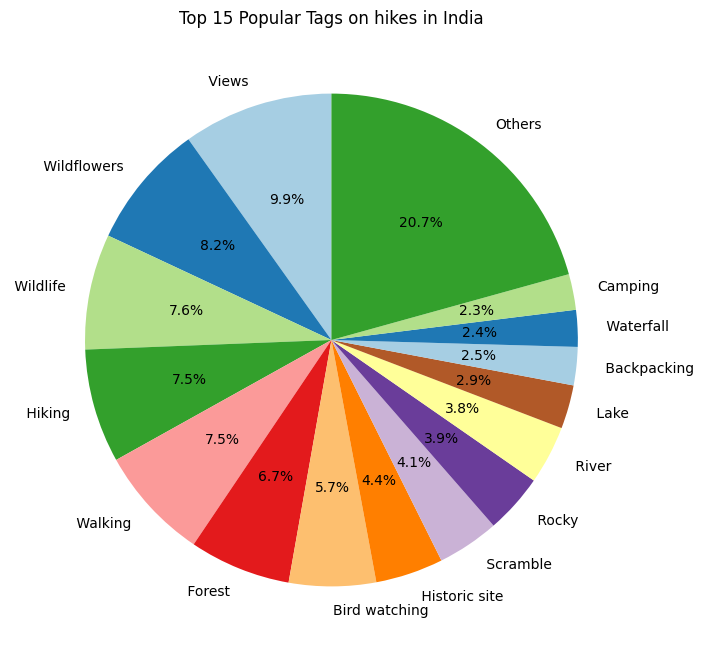

In [20]:
import matplotlib.pyplot as plt

# Split the tags in the 'Tags' column
tags_series = df['Tags'].dropna().str.split(',', expand=True).stack()

# Count the occurrences of each tag
tag_counts = tags_series.value_counts()

top_7_tags = tag_counts.head(15)

# Group the rest as 'Others'
others = tag_counts.iloc[15:].sum()
top_7_tags = pd.concat([top_7_tags, pd.Series({'Others': others})])

# Plotting the pie chart
plt.figure(figsize=(8, 8))
top_7_tags.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False, colors=plt.cm.Paired.colors)
plt.title('Top 15 Popular Tags on hikes in India')
plt.ylabel('')  # To remove the y-axis label
plt.show()

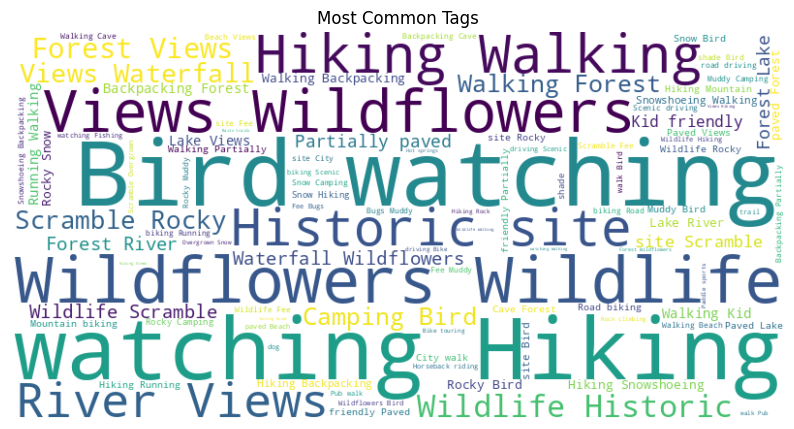

In [21]:
from wordcloud import WordCloud

# Combine all the tags into a single string
tags_combined = ' '.join(df['Tags'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Tags')
plt.show()


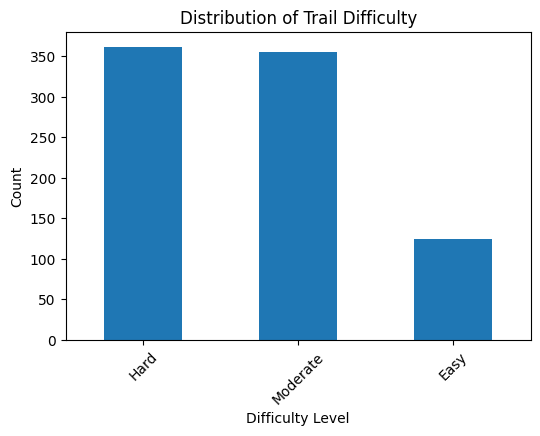

In [22]:
# Bar plot of difficulty levels
plt.figure(figsize=(6, 4))
df['Difficulty'].value_counts().plot(kind='bar')
plt.title('Distribution of Trail Difficulty')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


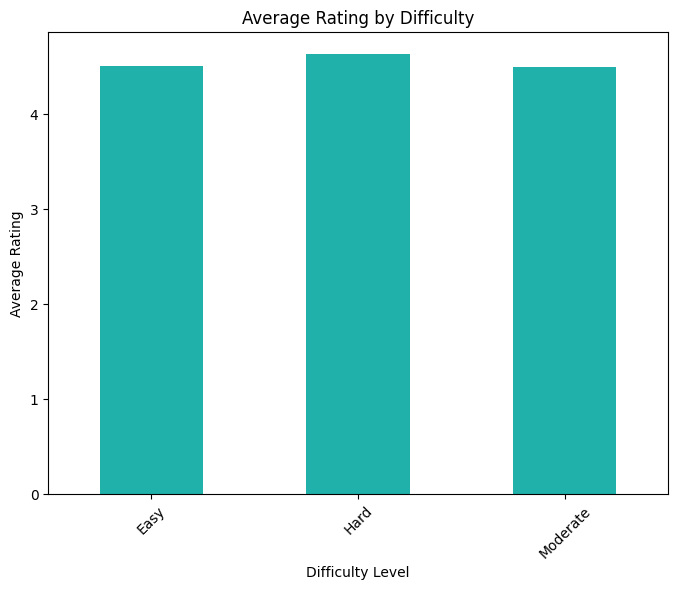

In [23]:
# Bar plot of average ratings by difficulty level
avg_rating_by_difficulty = df.groupby('Difficulty')['Average_rating'].mean()
avg_rating_by_difficulty.plot(kind='bar', color='lightseagreen', figsize=(8, 6))
plt.title('Average Rating by Difficulty')
plt.xlabel('Difficulty Level')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


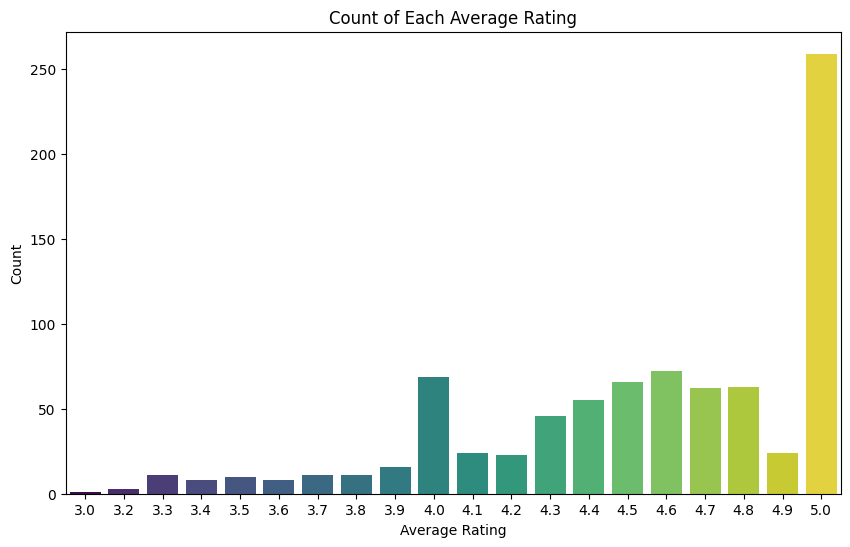

In [24]:
import seaborn as sns

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a count plot for the 'Average_rating' column
sns.countplot(x='Average_rating', data=df, hue='Average_rating', legend=False, palette="viridis")

# Set the plot labels and title
plt.title('Count of Each Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Count')

# Display the plot
plt.show()


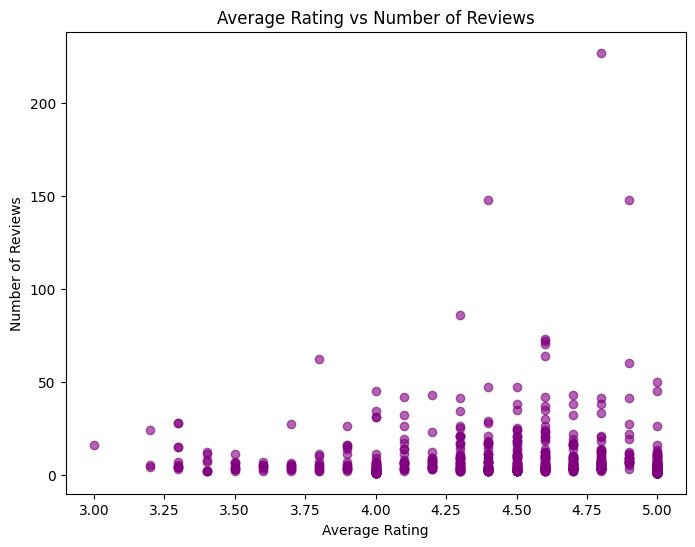

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scale the 'number_of_reviews' and 'Average_rating' columns
df[['scaled_reviews', 'scaled_rating']] = scaler.fit_transform(df[['number_of_reviews', 'Average_rating']])

# Calculate the combined score by adding the scaled columns
df['combined_score'] = df['scaled_reviews'] + df['scaled_rating']

top_10_trails = df[['Trail_name', 'number_of_reviews', 'Average_rating', 'combined_score']].sort_values(by='combined_score', ascending=False).head(10)

top_10_trails


,Trail_name,number_of_reviews,Average_rating,combined_score
2,Sinhagad Fort,227,4.8,1.900000
191,Sunset Point (Narhe) Extended,148,4.9,1.600442
65,Nahargarh Fort - Charan Mandir via Jaipur Wax ...,148,4.4,1.350442
185,Kukkarahalli Kere,50,5.0,1.216814
154,Khandoba Temple MTB Ride,60,4.9,1.211062
88,Khandoba Temple Trail,45,5.0,1.194690
150,Khandoba Tekdi,41,4.9,1.126991
4,Triund Hill Trek,73,4.6,1.118584
0,Triund Trek Loop,72,4.6,1.114159
195,Ghoravadeshwar,26,5.0,1.110619


In [26]:
df.head()

,Trail_name,link_AllTrails,image,Difficulty,Average_rating,number_of_reviews,Location,Length,description,Tags,scaled_reviews,scaled_rating,combined_score
0,Triund Trek Loop,https://www.alltrails.com/trail/india/himachal...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.6,72,"Dharmshala, Himachal Pradesh, India",Length: 19.0 km,This is one of the top tourist destinations in...,"Camping, Bird watching, Hiking, Snowshoeing, B...",0.314159,0.80,1.114159
1,Lamadugh Natural Valley Trek,https://www.alltrails.com/trail/india/himachal...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.3,86,Manali Wildlife Sanctuary,Length: 11.4 km,Lamadugh (Also known as Lamadug) is a popular ...,"Camping, Bird watching, Hiking, Snowshoeing, B...",0.376106,0.65,1.026106
2,Sinhagad Fort,https://www.alltrails.com/trail/india/maharash...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.8,227,"Velhe, Maharashtra, India",Length: 8.0 km,Sinhagad Fort is a fort that was built 2000 ye...,"Hiking, Walking, Partially paved, Forest, View...",1.000000,0.90,1.900000
3,Blackberry Hill - Attukad Falls Loop,https://www.alltrails.com/trail/india/kerala/b...,https://www.alltrails.com/api/alltrails/v2/tra...,Moderate,4.6,64,"Munnar, Kerala, India",Length: 9.3 kmEst. 3h 10m,This is a beautiful mountain biking trail in M...,"Hiking, Mountain biking, Partially paved, Fore...",0.278761,0.80,1.078761
4,Triund Hill Trek,https://www.alltrails.com/trail/india/himachal...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.6,73,"Dharamsala, Himachal Pradesh, India",Length: 9.5 km,This is one of the top tourist destinations in...,"Camping, Bird watching, Hiking, Snowshoeing, W...",0.318584,0.80,1.118584


In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'Difficulty' column
df['Difficulty_encoded'] = label_encoder.fit_transform(df['Difficulty'])

# Display the encoded column
df[['Difficulty', 'Difficulty_encoded']].head()


,Difficulty,Difficulty_encoded
0,Hard,1
1,Hard,1
2,Hard,1
3,Moderate,2
4,Hard,1


In [28]:
df['Trail_name'].nunique()

754

In [29]:
df.shape[0]

842

In [30]:
# Replace 'column_name' with the name of your column
duplicates = df[df.duplicated(subset='Trail_name', keep=False)]

# Display rows with duplicate entries in the column
duplicates


,Trail_name,link_AllTrails,image,Difficulty,Average_rating,number_of_reviews,Location,Length,description,Tags,scaled_reviews,scaled_rating,combined_score,Difficulty_encoded
80,Beas Kund Trail,https://www.alltrails.com/trail/india/himachal...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,4.9,11,"Manali, Himachal Pradesh, India",Length: 15.0 km,Beas Kund is a high-altitude glacial lake nest...,"Camping, Bird watching, Hiking, Backpacking, P...",0.044248,0.95,0.994248,1
427,Beas Kund Trail,https://www.alltrails.com/trail/india/himachal...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,5.0,2,"Manali, Himachal Pradesh, India",Length: 13.0 km,"Camping, Bird watching, Hiking, Backpacking, F...","Camping, Bird watching, Hiking, Backpacking, F...",0.004425,1.00,1.004425,1
514,Narasimha Parvatha (Malanduru) Trail,https://www.alltrails.com/trail/india/karnatak...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,5.0,2,Kudremukh National Park,Length: 19.3 kmEst. 6h 56m,This is one of the trails leading to the Naras...,"Bird watching, Hiking, Walking, Forest, River,...",0.004425,1.00,1.004425,1
515,Sinquerim Fort View Point Trail,https://www.alltrails.com/trail/india/goa/sinq...,https://www.alltrails.com/api/alltrails/v2/tra...,Moderate,4.3,3,"Mapusa, Goa, India",Length: 3.2 kmEst. 52m,It is a beautiful beach trail on the beach of ...,"Bird watching, Hiking, Walking, Partially pave...",0.008850,0.65,0.658850,2
516,Churdhar Trek,https://www.alltrails.com/trail/india/himachal...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,3.8,3,"Chaupal, Himachal Pradesh, India",Length: 10.3 km,Sarahan is a small village in the state of Him...,"Bird watching, Hiking, Snowshoeing, Walking, F...",0.008850,0.40,0.408850,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,Harishchandragad - Rajmarg Trail,https://www.alltrails.com/trail/india/maharash...,https://www.alltrails.com/api/alltrails/v2/tra...,Hard,5.0,1,"Junnar, Maharashtra, India",Length: 10.5 km,Harishchandragad is an ancient fort in the Nas...,"Bird watching, Hiking, Walking, Cave, Forest, ...",0.000000,1.00,1.000000,1
680,Ramadara Hill Trail,https://www.alltrails.com/trail/india/maharash...,https://www.alltrails.com/api/alltrails/v2/tra...,Moderate,4.6,3,"Saswad, Maharashtra, India",Length: 9.3 km,This is a beautiful trail that goes through th...,"Hiking, Running, Walking, Views, Wildflowers, ...",0.008850,0.80,0.808850,2
681,Leh - Pangong Tso Lake Trail,https://www.alltrails.com/trail/india/ladakh/l...,https://www.alltrails.com/api/alltrails/v3/tra...,Hard,4.0,2,"Leh, Ladakh, India",Length: 341.7 km,The route to Pangong from Leh is dotted with B...,"Camping, Bird watching, Mountain biking, Off-r...",0.004425,0.50,0.504425,1
682,Shore Temple - Beach,https://www.alltrails.com/trail/india/tamil-na...,https://www.alltrails.com/api/alltrails/v2/tra...,Easy,4.0,2,"Tirukalukundram, Tamil Nadu, India",Length: 2.7 kmEst. 32m,Shore temple is one of the oldest structural t...,"Bird watching, Hiking, Walking, Kid friendly, ...",0.004425,0.50,0.504425,0


In [31]:
num_duplicates = df.duplicated(subset='Trail_name', keep=False).sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 172


In [32]:
df = df.drop_duplicates(subset='Trail_name', keep='first')


In [33]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [35]:
df.shape[0]

754

In [34]:
df['Trail_name'].nunique()

754

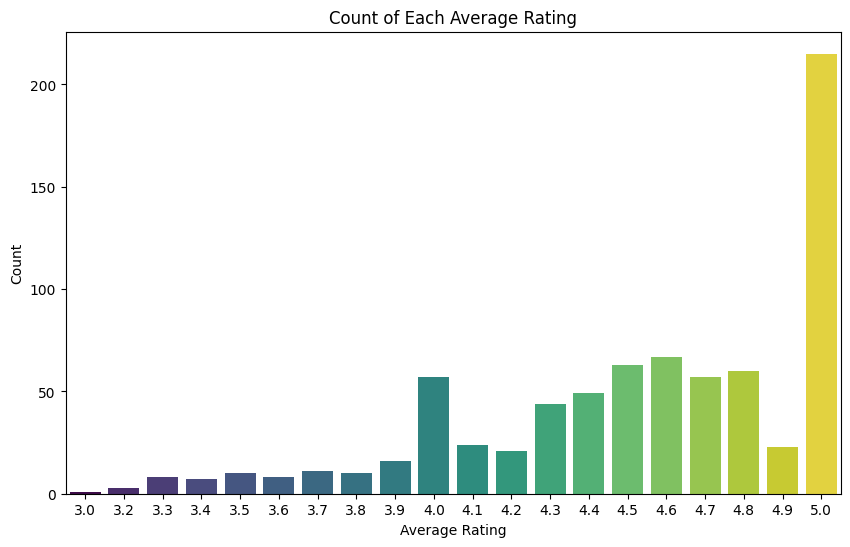

In [36]:
import seaborn as sns

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a count plot for the 'Average_rating' column
sns.countplot(x='Average_rating', data=df, hue='Average_rating', legend=False, palette="viridis")

# Set the plot labels and title
plt.title('Count of Each Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Count')

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

class PersonalizedTrailRecommender:
    def __init__(self):
        self.trails_df = None
        self.mlb = MultiLabelBinarizer()

    def preprocess_trails(self, trails_data):
        """Preprocess trail data to clean and structure it."""
        self.trails_df = pd.DataFrame(trails_data)
        self.trails_df['Tags'] = self.trails_df['Tags'].str.split(', ')
        # Extract numeric part of length and convert to float
        self.trails_df['Length'] = self.trails_df['Length'].str.extract(r'([\d.]+)').astype(float)

    def process_user_preferences(self, user_response):
        """Convert user preferences into feature vectors and tags."""
        features = {}
        preferred_tags = []

        # Mappings for user preferences to tags and features
        mappings = {
            'home_environment': {
                'A big city 🌆': ['Urban', 'Accessible'],
                'A peaceful small town 🏡': ['Accessible', 'Quiet'],
                'A bustling suburb just outside the city 🏘': ['Urban', 'Accessible'],
                'A rural area surrounded by nature 🌾': ['Nature', 'Rural'],
                'A mountain or hilly area 🏔': ['Mountain', 'Elevation'],
                'A coastal area by the beach 🌊': ['Coastal', 'Beach'],
            },
            'weekend_preference': {
                'Chilling with friends': ['Social', 'Easy'],
                'Exploring new places': ['Adventure', 'Scenic'],
                'Watching movies or gaming': ['Easy', 'Beginner'],
                'Going on adventures (like hiking)': ['Adventure', 'Challenge'],
            },
            'trail_length_preference': {
                'Short and sweet (under 5 km)': ['Short', 'Easy'],
                'A nice challenge (5-10 km)': ['Medium', 'Moderate'],
                'Long and tough (over 10 km)': ['Long', 'Hard'],
            },
            'hiking_companion': {
                'Alone for some peace and quiet': ['Solo', 'Quiet'],
                'With friends or a group': ['Group', 'Social'],
                'Family trips': ['Family', 'Easy'],
                'My pet 🐕': ['Pet-friendly', 'Accessible'],
            },
            'perfect_trail_features': {
                'Great scenery 🌄': ['Scenic', 'Views'],
                'Not too difficult, but enough exercise 💦': ['Moderate', 'Exercise'],
                'Close to a cool destination (like a waterfall or viewpoint) 💧': ['Destination', 'Feature'],
                'Good weather ☀️': ['Fair_weather'],
            },
            'dream_destination': {
                'A tropical island 🏝': ['Tropical', 'Coastal'],
                'A snowy mountain 🏔': ['Mountain', 'Snow'],
                'A peaceful forest 🌳': ['Forest', 'Peaceful'],
                'Anywhere with breathtaking views!': ['Scenic', 'Views'],
            },
            'music_preference': {
                'Chill acoustic tunes 🎸': ['Moderate', 'Peaceful'],
                'Pumped-up workout beats 🎧': ['Hard', 'Challenge'],
                'Nature sounds 🌿': ['Nature', 'Quiet'],
                'No music, just the sound of nature 🐦': ['Nature', 'Peaceful'],
            }
        }

        # Feature mappings for numeric values
        fitness_map = {'Couch potato 🛋': 0.2, 'Average, but could be better 🚶': 0.5, 'Pretty active 💪': 0.8, 'Athlete level 🏃‍♀️': 1.0}
        weather_map = {'No way, I\'ll reschedule 🛌': 0.2, 'Maybe if it\'s just cloudy ☁️': 0.5, 'Rain won\'t stop me! 🌧': 1.0}
        experience_map = {'Yes, a few times': 0.6, 'No, but I\'d like to try': 0.3, 'Yes, and I hike regularly': 1.0, 'Not my thing': 0.1}

        # Extract numeric features
        features['fitness_level'] = fitness_map.get(user_response.get('fitness_level', 'Average, but could be better 🚶'), 0.5)
        features['weather_tolerance'] = weather_map.get(user_response.get('weather_preference', 'Maybe if it\'s just cloudy ☁️'), 0.5)
        features['experience'] = experience_map.get(user_response.get('hiking_experience', 'No, but I\'d like to try'), 0.3)
        features['hiking_likelihood'] = int(user_response.get('hiking_likelihood', 3)) / 5.0

        # Collect preferred tags from mappings
        for category, tag_mapping in mappings.items():
            user_choice = user_response.get(category)
            if isinstance(user_choice, list):
                for choice in user_choice:
                    preferred_tags.extend(tag_mapping.get(choice, []))
            elif user_choice in tag_mapping:
                preferred_tags.extend(tag_mapping[user_choice])

        return features, list(set(preferred_tags))

    def get_recommendations(self, user_response, n_recommendations=3):
        """Get personalized trail recommendations based on user preferences."""
        features, preferred_tags = self.process_user_preferences(user_response)

        # Calculate trail scores
        scores = []
        for _, trail in self.trails_df.iterrows():
            score = 0

            # Match difficulty with fitness and experience
            difficulty_score = (features['fitness_level'] + features['experience']) / 2
            if trail['Difficulty'] == 'Hard':
                score += difficulty_score * 2 if difficulty_score > 0.6 else difficulty_score * 0.5
            elif trail['Difficulty'] == 'Moderate':
                score += difficulty_score * 1.5
            else:
                score += (1 - difficulty_score) * 1.5

            # Tag matching
            trail_tags = set(trail['Tags'])
            tag_match = len(trail_tags.intersection(preferred_tags)) / max(len(preferred_tags), 1)
            score += tag_match * 3

            # Length adjustment
            trail_length = trail['Length']
            if trail_length <= 5:
                score *= 1.2 if 'Short' in preferred_tags else 0.9
            elif trail_length <= 10:
                score *= 1.2 if 'Medium' in preferred_tags else 0.9
            else:
                score *= 1.2 if 'Long' in preferred_tags else 0.8

            # Weather adjustment
            if 'all_weather' in trail_tags:
                score *= (1 + features['weather_tolerance'])
            elif 'fair_weather' in trail_tags and features['weather_tolerance'] < 0.5:
                score *= 1.1

            # Hiking likelihood impact
            score *= (0.5 + features['hiking_likelihood'])
            scores.append(score)

        # Get top recommendations
        recommendations_idx = np.argsort(scores)[::-1][:n_recommendations]
        recommendations = self.trails_df.iloc[recommendations_idx].copy()
        recommendations['Match_Score'] = [scores[i] for i in recommendations_idx]

        return recommendations


def format_user_recommendations(recommendations):
    """Format the recommendations for display."""
    output = []
    for _, trail in recommendations.iterrows():
        output.append(
            f"🏃‍♂️ {trail['Trail_name']}\n"
            f"📍 Location: {trail['Location']}\n"
            f"💪 Difficulty: {trail['Difficulty']}\n"
            f"📏 Length: {trail['Length']} km\n"
            f"⭐ Rating: {trail['Average_rating']}/5.0\n"
            f"🎯 Match Score: {trail['Match_Score']:.2f}\n"
            f"🏷️ Features: {', '.join(trail['Tags'])}\n"
        )
    return "\n".join(output)


# Example usage
sample_user = {
    'home_environment': 'A peaceful small town 🏡',
    'weekend_preference': 'Going on adventures (like hiking)',
    'fitness_level': 'Pretty active 💪',
    'hiking_experience': 'Yes, a few times',
    'trail_length_preference': ['A nice challenge (5-10 km)', 'Long and tough (over 10 km)'],
    'hiking_companion': 'With friends or a group',
    'perfect_trail_features': ['Great scenery 🌄', 'Close to a cool destination (like a waterfall or viewpoint) 💧'],
    'dream_destination': 'A snowy mountain 🏔',
    'music_preference': 'Nature sounds 🌿',
    'weather_preference': 'Rain won\'t stop me! 🌧',
    'hiking_likelihood': 4
}

recommender = PersonalizedTrailRecommender()
recommender.preprocess_trails(df)
recommendations = recommender.get_recommendations(sample_user, n_recommendations=3)
print(format_user_recommendations(recommendations))

# using Apache Spark

In [37]:
!pip install pyspark


In [38]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, split, explode, count, mean, stddev, max, min

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Hiking Data Analysis") \
    .getOrCreate()

In [49]:
#loading the dataframes
# trails_data_path = "/content/drive/MyDrive/trails_df.csv"
survey_data_path = "/content/drive/MyDrive/survey_df.csv"

trails_df = spark.createDataFrame(df)
survey_df = spark.read.option("header", "true").csv(survey_data_path)

# View Schema
print("Trails Data Schema:")
trails_df.printSchema()

print("\nSurvey Data Schema:")
survey_df.printSchema()

Trails Data Schema:
root
 |-- Trail_name: string (nullable = true)
 |-- link_AllTrails: string (nullable = true)
 |-- image: string (nullable = true)
 |-- Difficulty: string (nullable = true)
 |-- Average_rating: double (nullable = true)
 |-- number_of_reviews: long (nullable = true)
 |-- Location: string (nullable = true)
 |-- Length: string (nullable = true)
 |-- description: string (nullable = true)
 |-- Tags: string (nullable = true)
 |-- scaled_reviews: double (nullable = true)
 |-- scaled_rating: double (nullable = true)
 |-- combined_score: double (nullable = true)
 |-- Difficulty_encoded: long (nullable = true)


Survey Data Schema:
root
 |-- Your name: string (nullable = true)
 |-- Hometown: string (nullable = true)
 |-- Which best describes your home place?: string (nullable = true)
 |-- How do you prefer to spend your weekends?: string (nullable = true)
 |-- How would you describe your fitness level?: string (nullable = true)
 |-- Have you ever been on a hike ?: string (null

In [50]:
# Count Records
print(f"\nNumber of records in trails data: {trails_df.count()}")
print(f"Number of records in survey data: {survey_df.count()}")




Number of records in trails data: 754
Number of records in survey data: 24


In [51]:
trails_df.show(3)

+--------------------+--------------------+--------------------+----------+--------------+-----------------+--------------------+---------------+--------------------+--------------------+-------------------+------------------+------------------+------------------+
|          Trail_name|      link_AllTrails|               image|Difficulty|Average_rating|number_of_reviews|            Location|         Length|         description|                Tags|     scaled_reviews|     scaled_rating|    combined_score|Difficulty_encoded|
+--------------------+--------------------+--------------------+----------+--------------+-----------------+--------------------+---------------+--------------------+--------------------+-------------------+------------------+------------------+------------------+
|    Triund Trek Loop|https://www.alltr...|https://www.alltr...|      Hard|           4.6|               72|Dharmshala, Himac...|Length: 19.0 km|This is one of th...|Camping, Bird wat...| 0.314159292035398

In [52]:
# Null Value Analysis
print("\nNull Value Count in Trails Data:")
trails_df.select([(count(col(c)) - count(col(c)).alias(c)) for c in trails_df.columns]).show()

print("\nNull Value Count in Survey Data:")
survey_df.select([(count(col(c)) - count(col(c)).alias(c)) for c in survey_df.columns]).show()


Null Value Count in Trails Data:
+-----------------------------------------------------+-----------------------------------------------------------------+--------------------------------------+-----------------------------------------------------+-----------------------------------------------------------------+--------------------------------------------------------------------------+-----------------------------------------------+-----------------------------------------+--------------------------------------------------------+-----------------------------------+-----------------------------------------------------------------+--------------------------------------------------------------+-----------------------------------------------------------------+-----------------------------------------------------------------------------+
|(count(Trail_name) - count(Trail_name) AS Trail_name)|(count(link_AllTrails) - count(link_AllTrails) AS link_AllTrails)|(count(image) - count(image) AS i

## Analysis

In [55]:
print("\nDescriptive Statistics for Trails Data:")
# Difficulty - 1 (hard), 2(medium), 3(easy)
trails_df.select("number_of_reviews", "Average_rating", "Difficulty_encoded").describe().show()



Descriptive Statistics for Trails Data:
+-------+-----------------+-------------------+------------------+
|summary|number_of_reviews|     Average_rating|Difficulty_encoded|
+-------+-----------------+-------------------+------------------+
|  count|              754|                754|               754|
|   mean|  8.3342175066313|  4.538992042440317|1.2758620689655173|
| stddev|14.78126381194311|0.44386572086279075|0.7034544714714405|
|    min|                1|                3.0|                 0|
|    max|              227|                5.0|                 2|
+-------+-----------------+-------------------+------------------+



In [59]:
difficulty_stats = trails_df.groupBy("Difficulty").agg(
    count("*").alias("Trail_Count"),
    mean("number_of_reviews").alias("Avg_Reviews(popularity)"),
    mean("Average_rating").alias("Avg_Rating"),
    mean("Difficulty_encoded").alias("Difficulty_encoded"),
)
print("\nTrail Benchmarking by Difficulty:")
difficulty_stats.show()


Trail Benchmarking by Difficulty:
+----------+-----------+-----------------------+-----------------+------------------+
|Difficulty|Trail_Count|Avg_Reviews(popularity)|       Avg_Rating|Difficulty_encoded|
+----------+-----------+-----------------------+-----------------+------------------+
|      Easy|        111|      8.945945945945946|4.498198198198199|               0.0|
|      Hard|        324|       8.36111111111111| 4.60462962962963|               1.0|
|  Moderate|        319|      8.094043887147336| 4.48652037617555|               2.0|
+----------+-----------+-----------------------+-----------------+------------------+



In [60]:
tags_df = trails_df.select("Trail_name", explode(split(col("Tags"), ", ")).alias("Tag"))
tag_counts = tags_df.groupBy("Tag").count().orderBy(col("count").desc())
print("\nTop Tags Used in Trails:")
tag_counts.show(10)


Top Tags Used in Trails:
+-------------+-----+
|          Tag|count|
+-------------+-----+
|        Views|  714|
|       Hiking|  675|
|  Wildflowers|  593|
|Bird watching|  572|
|      Walking|  562|
|     Wildlife|  548|
|       Forest|  481|
|Historic site|  329|
|     Scramble|  297|
|        River|  284|
+-------------+-----+
only showing top 10 rows



In [63]:
preferences_df = survey_df.select(explode(split(col("What kind of hiking trail would you try (or have tried)? (Choose up to 3)"), ", ")).alias("Preference"))
common_preferences = preferences_df.groupBy("Preference").count().orderBy(col("count").desc())
print("\nMost Common Preferences in Survey Data:")
common_preferences.show(n = 10, truncate=False)


Most Common Preferences in Survey Data:
+-----------------------------------------+-----+
|Preference                               |count|
+-----------------------------------------+-----+
|Just a relaxing walk through the woods 🌲|12   |
|Easy paths with good views 🏞            |10   |
|A nice challenge (5-10 km)               |9    |
|Thrilling and tough mountain trails 🏔   |9    |
|Short and sweet (under 5 km)             |7    |
|Long and tough (over 10 km)              |5    |
+-----------------------------------------+-----+

